## **INIT MAFA DATASET**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/My\ Drive/MAFA /content/

In [0]:
%cd /content/MAFA/
!unzip train-images.zip
!unzip MAFA-Label-Train.zip

/content/MAFA
Archive:  train-images.zip
   creating: images/
  inflating: images/train_00000001.jpg  
  inflating: images/train_00000002.jpg  
  inflating: images/train_00000003.jpg  
  inflating: images/train_00000004.jpg  
  inflating: images/train_00000005.jpg  
  inflating: images/train_00000006.jpg  
  inflating: images/train_00000007.jpg  
  inflating: images/train_00000008.jpg  
  inflating: images/train_00000009.jpg  
  inflating: images/train_00000010.jpg  
  inflating: images/train_00000011.jpg  
  inflating: images/train_00000012.jpg  
  inflating: images/train_00000013.jpg  
  inflating: images/train_00000014.jpg  
  inflating: images/train_00000015.jpg  
  inflating: images/train_00000016.jpg  
  inflating: images/train_00000017.jpg  
  inflating: images/train_00000018.jpg  
  inflating: images/train_00000019.jpg  
  inflating: images/train_00000020.jpg  
  inflating: images/train_00000021.jpg  
  inflating: images/train_00000022.jpg  
  inflating: images/train_00000023.j

In [0]:
!unzip test-images.zip
!unzip MAFA-Label-Test.zip

Archive:  test-images.zip
   creating: images/
  inflating: images/test_00000001.jpg  
  inflating: images/test_00000002.jpg  
  inflating: images/test_00000003.jpg  
  inflating: images/test_00000004.jpg  
  inflating: images/test_00000005.jpg  
  inflating: images/test_00000006.jpg  
  inflating: images/test_00000007.jpg  
  inflating: images/test_00000008.jpg  
  inflating: images/test_00000009.jpg  
  inflating: images/test_00000010.jpg  
  inflating: images/test_00000011.jpg  
  inflating: images/test_00000012.jpg  
  inflating: images/test_00000013.jpg  
  inflating: images/test_00000014.jpg  
  inflating: images/test_00000015.jpg  
  inflating: images/test_00000016.jpg  
  inflating: images/test_00000017.jpg  
  inflating: images/test_00000018.jpg  
  inflating: images/test_00000019.jpg  
  inflating: images/test_00000020.jpg  
  inflating: images/test_00000021.jpg  
  inflating: images/test_00000022.jpg  
  inflating: images/test_00000023.jpg  
  inflating: images/test_00000024

In [0]:
import scipy.io
matTrain = scipy.io.loadmat('/content/MAFA/LabelTrainAll.mat')
matTest = scipy.io.loadmat('/content/MAFA/LabelTestAll.mat')

In [0]:
print(matTrain.keys())
print(matTest.keys())

dict_keys(['__header__', '__version__', '__globals__', 'label_train'])
dict_keys(['__header__', '__version__', '__globals__', 'LabelTest'])


## **EXTRACT TRAIN SET**

In [0]:
#Read train
label_train = matTrain['label_train']
print(label_train.dtype)
print(label_train.shape,label_train.size)
print(label_train[0,0]['imgName'],label_train[0,0]['label'])
imgName = label_train[0]['imgName']
label = label_train[0]['label']

[('orgImgName', 'O'), ('imgName', 'O'), ('label', 'O')]
(1, 25876) 25876
['train_00000001.jpg'] [[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [0]:
print(imgName[0])
print(label[0])

['train_00000001.jpg']
[[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [0]:
n = [0,0,0,0]
for i in range(label.size):
  t = label[i][0][12]
  n[t]=n[t]+1
print(n)

[0, 12730, 11126, 2020]


In [0]:
#Write Train
import cv2
import numpy as np
import os 
pathIn = '/content/MAFA/train'
pathOut = '/content/MAFA-Crop/train'
numM1, numM2, numN = 0, 0, 0
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[y:y+int(h), x:x+int(w)]
  img_label = label[i][0][12]
  if img_label == 1:
    numM1 += 1
    if numM1 > 1000: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 1000: continue
    img_label = 'M'
  else: 
    numN += 1
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)
  

In [0]:
%cd /content/MAFA-Crop/train/
!ls
print(index)

/content/MAFA-Crop/train
M_1000.jpg  M_165.jpg	M_3.jpg     N_1216.jpg	N_2689.jpg  N_3358.jpg
M_1001.jpg  M_1661.jpg	M_400.jpg   N_1217.jpg	N_2690.jpg  N_3359.jpg
M_1002.jpg  M_1662.jpg	M_401.jpg   N_1227.jpg	N_2691.jpg  N_3360.jpg
M_1003.jpg  M_1663.jpg	M_402.jpg   N_1236.jpg	N_2692.jpg  N_3361.jpg
M_1004.jpg  M_1664.jpg	M_403.jpg   N_1237.jpg	N_2693.jpg  N_3362.jpg
M_1005.jpg  M_1666.jpg	M_404.jpg   N_1252.jpg	N_2694.jpg  N_3363.jpg
M_1006.jpg  M_1667.jpg	M_405.jpg   N_1257.jpg	N_2695.jpg  N_3364.jpg
M_1007.jpg  M_1668.jpg	M_406.jpg   N_1260.jpg	N_2696.jpg  N_3365.jpg
M_1008.jpg  M_1669.jpg	M_407.jpg   N_1261.jpg	N_2697.jpg  N_3366.jpg
M_1009.jpg  M_166.jpg	M_408.jpg   N_1262.jpg	N_2698.jpg  N_3367.jpg
M_100.jpg   M_1670.jpg	M_409.jpg   N_1283.jpg	N_2699.jpg  N_3368.jpg
M_1010.jpg  M_1671.jpg	M_40.jpg    N_1291.jpg	N_2700.jpg  N_3369.jpg
M_1011.jpg  M_1672.jpg	M_410.jpg   N_1356.jpg	N_2701.jpg  N_3370.jpg
M_1012.jpg  M_1673.jpg	M_411.jpg   N_1402.jpg	N_2702.jpg  N_3371.jpg
M_1013.jpg 

## **EXTRACT TEST SET**

In [0]:
label_test = matTest['LabelTest']
print(label_test.dtype)
print(label_test.shape,label_test.size)
print(label_test[0,0]['name'],label_test[0,0]['label'])
imgName = label_test[0]['name']
label = label_test[0]['label']

[('name', 'O'), ('label', 'O')]
(1, 4935) 4935
['test_00000001.jpg'] [[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [0]:
print(imgName[0])
print(label[0])

['test_00000001.jpg']
[[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [0]:
n = [0,0,0,0]
for i in range(label.size):
  t = int(label[i][0][9])
  n[t]=n[t]+1
print(n)

[0, 2698, 1677, 560]


In [0]:
#Write Test
import cv2
import numpy as np
import os 
pathIn = '/content/MAFA/test'
pathOut = '/content/MAFA-Crop/test'
numM1, numM2, numN = 0, 0, 0 #Want test set has 1000 imgs
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[int(y):int(y)+int(h), int(x):int(x)+int(w)]
  img_label = int(label[i][0][9])
  if img_label == 1:
    numM1 += 1
    if numM1 > 250: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 250: continue
    img_label = 'M'
  else: 
    numN += 1
    if numN > 500: continue
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)

In [0]:
%cd /content/MAFA-Crop/test
!ls
print(index)

/content/MAFA-Crop/test
M_100.jpg  M_22.jpg   M_361.jpg  M_497.jpg   N_572.jpg	N_715.jpg  N_858.jpg
M_101.jpg  M_230.jpg  M_362.jpg  M_498.jpg   N_573.jpg	N_716.jpg  N_859.jpg
M_102.jpg  M_231.jpg  M_363.jpg  M_49.jpg    N_574.jpg	N_717.jpg  N_860.jpg
M_103.jpg  M_232.jpg  M_364.jpg  M_4.jpg     N_575.jpg	N_718.jpg  N_861.jpg
M_104.jpg  M_233.jpg  M_365.jpg  M_500.jpg   N_576.jpg	N_719.jpg  N_862.jpg
M_105.jpg  M_234.jpg  M_366.jpg  M_502.jpg   N_577.jpg	N_720.jpg  N_863.jpg
M_106.jpg  M_235.jpg  M_367.jpg  M_504.jpg   N_578.jpg	N_721.jpg  N_864.jpg
M_107.jpg  M_236.jpg  M_368.jpg  M_505.jpg   N_579.jpg	N_722.jpg  N_865.jpg
M_108.jpg  M_237.jpg  M_369.jpg  M_506.jpg   N_580.jpg	N_723.jpg  N_866.jpg
M_109.jpg  M_238.jpg  M_36.jpg	 M_509.jpg   N_581.jpg	N_724.jpg  N_867.jpg
M_10.jpg   M_239.jpg  M_370.jpg  M_50.jpg    N_582.jpg	N_725.jpg  N_868.jpg
M_110.jpg  M_23.jpg   M_371.jpg  M_511.jpg   N_583.jpg	N_726.jpg  N_869.jpg
M_111.jpg  M_240.jpg  M_372.jpg  M_514.jpg   N_584.jpg	N_727.jpg 

## **MOVE CROP DATA TO DRIVE**

In [0]:
!cp -r /content/MAFA-Crop /content/drive/My\ Drive

## **LOAD CROP DATA FROM DRIVE**

In [0]:
!apt update
!apt-get install zip

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [75.1 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 P

In [0]:
!cp -r /content/drive/My\ Drive/MAFA-Crop  /content/

## **IMPORT**

In [0]:
%tensorflow_version 1.x

In [0]:
!pip install Pillow
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 2.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3


In [0]:
# defines

DIR_IMG_TRAIN = '/content/MAFA-Crop/train/'
DIR_IMG_TEST = '/content/MAFA-Crop/test/'
DIR_TMP_DATA = '/content/Checkpoint/'
DIR_OUTPUT = '/content/drive/My Drive/MAFA-Crop/models/'

IMG_SHAPE = (150,150,3)

In [0]:
# imports

import os
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import time

%matplotlib inline

## **EXPLORING THE DATA**

Image have shape: (91, 91, 3)


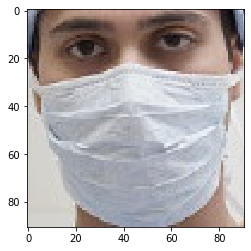

In [0]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_1.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

Image have shape: (150, 150, 3)


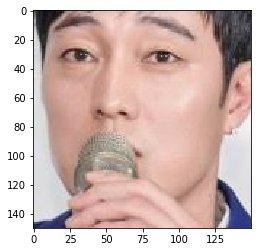

In [0]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'N_1216.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

## **PREPROCESS DATA AND SPLIT TRAIN SET, VALID SET**

Using TensorFlow backend.


Mask #1 as image:


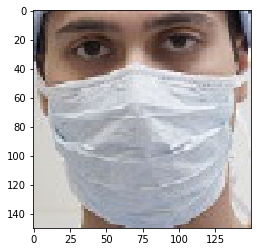

In [0]:
#PREPROCESSED DATA
# as long as images have different sizes, let's resize!

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def loadAndResizeImage (img, w, h):
    '''
    loads the image in 'img' path and returns a PIL image of size (w,h)
    '''
    return image.load_img (img, target_size=(w,h))

# Mask example resized
mask_index = 1
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_'+str(mask_index)+'.jpg')
sample_img = loadAndResizeImage (sample_img_path, IMG_SHAPE[0], IMG_SHAPE[1])
plt.imshow(sample_img)
print ('Mask #'+str(mask_index)+' as image:')

In [0]:
#GET LABEL
from PIL import Image

def getLabel (X):
    """
    Return the label for an element based on the filename: 
        mask -> 1 
        non_mask -> 0
    """
    if ('M' in X):
        return 1
    else:
        return 0
    
def getLabels (X):
    """
    Returns an array that contains the label for each X
    """
    return np.array([getLabel(X[i]) for i in range(len(X))])

def getLabelFromScore (score):
    """
    Returns the label based on the probability
    if score >= 0.5, return 'mask'
    else return 'non_mask'
    """
    if (score >=0.5):
        return 'M'
    else:
        return 'N'

def normalizedArrayFromImageInPath (image_path, img_shape):
    """
    returns an the image in 'image' path normalized in an np array
    """
    img = loadAndResizeImage (image_path, img_shape[0], img_shape[1])
    return image.img_to_array(img) / 255.

def loadResizeNormalizeImages (basepath, path_array, img_shape):
    """
    Loads the images from the path 
    and returns them in an array
    """
    images = np.empty ((len(path_array), img_shape[0], img_shape[1], img_shape[2]), dtype=np.float32)
    for i in range (len(path_array)):
        images[i] = normalizedArrayFromImageInPath (os.path.join(basepath,path_array[i]), img_shape)
    return images

In [0]:
#CREATE TRAINING AND VALIDATION SETS
import os
import numpy as np

train_imgs = os.listdir(DIR_IMG_TRAIN)
train_imgs.sort()

#TRAIN VALID TEST: 70 10 20 => TOTAL ~ 5000

#Training data have 3500 img
train_x = np.append(train_imgs[:1750],train_imgs[-1750:])
train_y = getLabels (train_x)

print ("Number of training examples = {}".format(len(train_x)))
print ("Number of training labels = {}".format(len(train_y)))

#Validation data have 500 img 
validation_x = np.append(train_imgs[1750:2000],train_imgs[-2000:-1750])
validation_y = getLabels (validation_x)

print ("Number of validation examples = {}".format (len(validation_x)))
print ("Number of validation labels = {}".format(len(validation_y)))

Number of training examples = 3500
Number of training labels = 3500
Number of validation examples = 500
Number of validation labels = 500


In [0]:
#CHECKPOINT 
img_train_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, train_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'train_x'), img_train_x)
print (img_train_x.shape)
print ('Input X for training saved!')

img_validation_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, validation_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'validation_x'), img_validation_x)
print (img_validation_x.shape)
print ('Input X for validation saved!')

print ('Checkpoint 1')

(3500, 150, 150, 3)
Input X for training saved!
(500, 150, 150, 3)
Input X for validation saved!
Checkpoint 1


In [0]:
#Save in drive
!cp /content/dataset/train_x.npy /content/drive/My\ Drive/Colab
!cp /content/dataset/validation_x.npy /content/drive/My\ Drive/Colab

In [0]:
#PROPORTION
def MaskVsNon_MaskProportion (labels):
    N = 0
    M = 0
    for label in labels:
        if (label == 1):
            M = M + 1
        else:
            N = N + 1

    N_percent = (N/len(labels))*100.0
    M_percent = 100.0 - N_percent

    return M_percent, N_percent

In [0]:
import numpy as np
img_train_x = np.load (os.path.join(DIR_TMP_DATA,'train_x')+'.npy')
img_validation_x = np.load (os.path.join(DIR_TMP_DATA,'validation_x')+'.npy')

M, N = MaskVsNon_MaskProportion (train_y)
print ("--> Training set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M))

M, N = MaskVsNon_MaskProportion (validation_y)
print ("--> Validation set: Non Mask represent "+str(N)+"% of the total")
print ("    Non Mask represent "+str(M))

--> Training set: Non Mask represent 50.0% of the total
    Mask represent 50.0
--> Validation set: Non Mask represent 50.0% of the total
    Non Mask represent 50.0


## **BUILDING THE MODEL**

In [0]:
#BUILDING THE MODEL
#Hide Warning tensorflow
#--------
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#---------
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
non_dense_predictions = Dense(1, activation='sigmoid')(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout (0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout (0.3)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## **TRAINING**

In [0]:
model.fit (x=img_train_x, y=train_y, 
           batch_size=16, epochs=10, 
           validation_data=(img_validation_x, validation_y))

Train on 3500 samples, validate on 500 samples
Epoch 1/10
3500/3500 [==============================] - 25s 7ms/step - loss: 0.5294 - acc: 0.7469 - val_loss: 0.2745 - val_acc: 0.8960
Epoch 2/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3638 - acc: 0.8466 - val_loss: 0.2562 - val_acc: 0.9120
Epoch 3/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3222 - acc: 0.8640 - val_loss: 0.2554 - val_acc: 0.9180
Epoch 4/10
3500/3500 [==============================] - 16s 5ms/step - loss: 0.3218 - acc: 0.8723 - val_loss: 0.6494 - val_acc: 0.8020
Epoch 5/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3028 - acc: 0.8800 - val_loss: 0.2451 - val_acc: 0.9040
Epoch 6/10
3500/3500 [==============================] - 16s 5ms/step - loss: 0.2837 - acc: 0.8857 - val_loss: 0.3075 - val_acc: 0.9240
Epoch 7/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.2928 - acc: 0.8771 - val_loss: 0.4161 - val_acc: 0.8660
Epoch 8/

## **SAVING AND LOADING KERAS MODEL**

In [0]:
#Save model
print ('Saving the model...')
model.save(os.path.join(DIR_OUTPUT,'model-10ep.h5'))
print ('Model saved! Filename: {}'.format (os.path.join(DIR_OUTPUT,'model-10ep-.h5')))
print ('Checkpoint 2')

Saving the model...
Model saved! Filename: /content/drive/My Drive/MAFA-Crop/models/model-10ep-.h5
Checkpoint 2


In [0]:
#Load model
from keras.models import load_model
model = load_model(os.path.join(DIR_TMP_DATA,'model-10ep.h5'))
print ('Model loaded!')

Model loaded!


## **EVALUATION**

In [0]:
# Evaluation with test images the model didn't see before

#Test set original have 1000 img

test_imgs = os.listdir(DIR_IMG_TEST)

test_x = test_imgs

test_y = getLabels (test_x)

print ("Number of test set images= "+str(len(test_x)))
print ("Number of test set labels = "+str(len(test_y)))

print ("First element of test set "+test_x[0])
print ("Label of first element of test set = "+str(test_y[0]))

Number of test set images= 1000
Number of test set labels = 1000
First element of test set M_505.jpg
Label of first element of test set = 1


In [0]:
img_test_x = loadResizeNormalizeImages (DIR_IMG_TEST, test_x, IMG_SHAPE)
print (img_test_x.shape)

(1000, 150, 150, 3)


In [0]:
print ('Saving test set...')
np.save (os.path.join(DIR_TMP_DATA,'test_x'), img_test_x)
print ('Input X for test saved!')
print ('Checkpoint 3')

Saving test set...
Input X for test saved!
Checkpoint 3


In [0]:
#Save in drive
!cp -r /content/Checkpoint /content/drive/My\ Drive/

In [0]:
img_test_x = np.load (os.path.join(DIR_TMP_DATA,'test_x')+'.npy')
print ('Input X for evaluation loaded!')

# check the proportion organic vs recyclable
M, N = MaskVsNon_MaskProportion (test_y)

print ("--> Test set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M)+"%")

Input X for evaluation loaded!
--> Test set: Non Mask represent 50.0% of the total
    Mask represent 50.0%


In [0]:
preds = model.evaluate (x=img_test_x, y=test_y, batch_size=10)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1000/1000 [==============================] - 6s 6ms/step

Loss = 0.534588583020959
Test Accuracy = 0.8589999938011169


## **PREDICT**

In [0]:
def predictFromPath (img_path, img_size=(150,150)):
    img = normalizedArrayFromImageInPath (img_path, img_size)
    return predictFromImg (img)

def predictFromImg (img):
    x = np.expand_dims(img, axis=0)
    return model.predict(x)[0][0]

In [0]:
%cd /content/MAFA-Crop/test
!ls

Prediction took 0.052 seconds
It's a N! (with a score of 0.07839389145374298) 0 -> Non Mask / 1 -> Mask


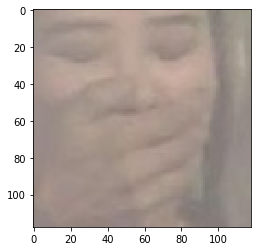

In [0]:
img_path = DIR_IMG_TEST+'N_776.jpg'
display_img = image.load_img(img_path)
start = time.time()
score = predictFromPath (img_path)
end = time.time()
print("Prediction took {:.3f} seconds".format (end - start))
print("It's a {}! (with a score of {}) 0 -> Non Mask / 1 -> Mask".format (getLabelFromScore (score), score))
plt.imshow(display_img)


In [0]:
import numpy as np
import cv2
img_path = DIR_IMG_TEST+'N_776.jpg'
display_img = image.load_img(img_path)
img = np.array(display_img)
img = cv2.resize(img,(150,150))
img = img/255.0
score = predictFromImg(img)
print(score)


0.108090445
